In [1]:
### 🔧 TAREA
#Explora el dataset e intenta responder:
#
#- ¿Qué variables tienen valores faltantes?
#- ¿Qué variables parecen más correlacionadas con el target?
#- ¿Hay valores extremos que deberías tratar?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuración de estilo
sns.set(style="whitegrid")

In [4]:
# 📥 Cargar el dataset limpio
df = pd.read_csv("../data/credit_clean.csv")

# 👁️ Primer vistazo a los datos
df.head()

# 🧼 Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40016 entries, 0 to 40015
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      40016 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  40016 non-null  float64
 2   age                                   40016 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  40016 non-null  int64  
 4   DebtRatio                             40016 non-null  float64
 5   MonthlyIncome                         40016 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       40016 non-null  int64  
 7   NumberOfTimes90DaysLate               40016 non-null  float64
 8   NumberRealEstateLoansOrLines          40016 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  40016 non-null  int64  
 10  NumberOfDependents                    40016 non-null  float64
 11  TotalPastDue   

Distribución del target:
SeriousDlqin2yrs
1    0.5002
0    0.4998
Name: proportion, dtype: float64


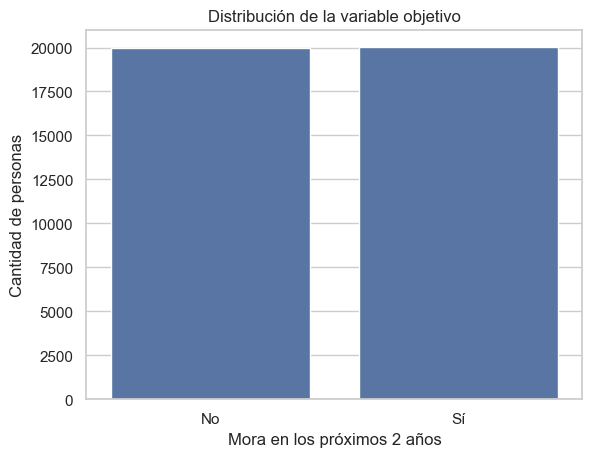

In [5]:
# 🔍 Distribución de la variable objetivo
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

sns.countplot(data=df, x="SeriousDlqin2yrs")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Mora en los próximos 2 años")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

In [6]:
# 📊 Estadísticas descriptivas
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TotalPastDue,MonthlyDebt,UtilizationPerLine,RealEstateLoanRatio
count,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,4.001600e+04,4.001600e+04,40016.000000
mean,0.500200,0.492060,49.262195,0.579193,288.538272,5859.926733,8.160661,0.303209,0.956342,0.207867,0.822196,1.090269,1.556044e+06,2.760785e+04,0.116649
std,0.500006,0.400755,14.208062,1.036013,880.993548,3656.497306,5.175781,0.688041,1.034465,0.519541,1.124422,1.734203,4.780316e+06,1.638341e+05,0.142638
min,0.000000,0.000000,24.000000,0.000000,0.000000,653.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.072469,39.000000,0.000000,0.182940,3550.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.877502e+02,8.763649e-03,0.000000
50%,1.000000,0.441448,48.000000,0.000000,0.390770,5443.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.152688e+03,4.712686e-02,0.090909
75%,1.000000,0.941515,59.000000,1.000000,0.868648,6812.750000,11.000000,0.000000,2.000000,0.000000,1.000000,2.000000,5.043474e+03,1.408453e-01,0.181818
max,1.000000,1.093946,87.000000,4.000000,4985.490000,23087.900000,24.000000,2.490000,4.000000,2.000000,4.000000,8.490000,2.713602e+07,1.093946e+06,1.000000


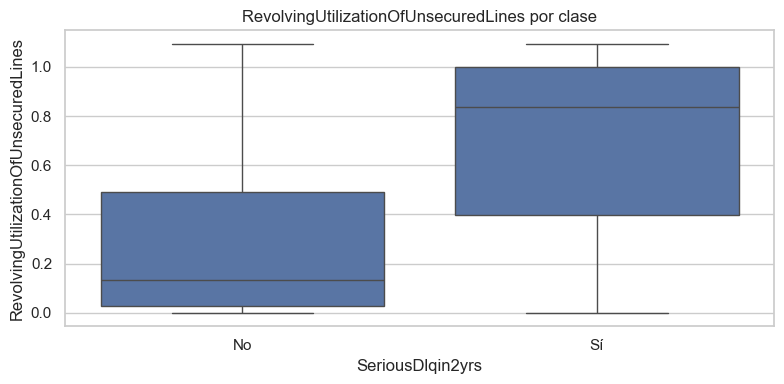

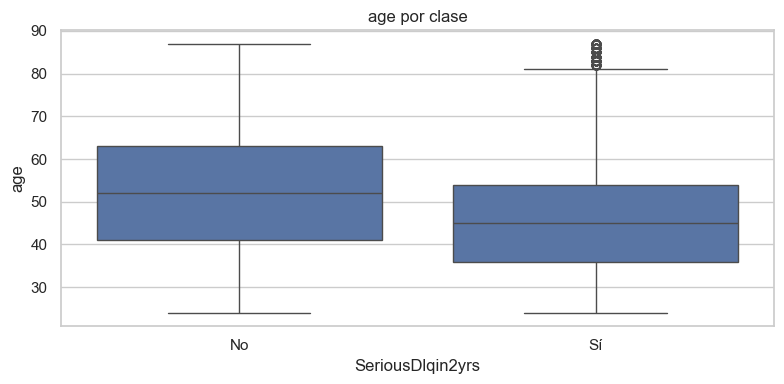

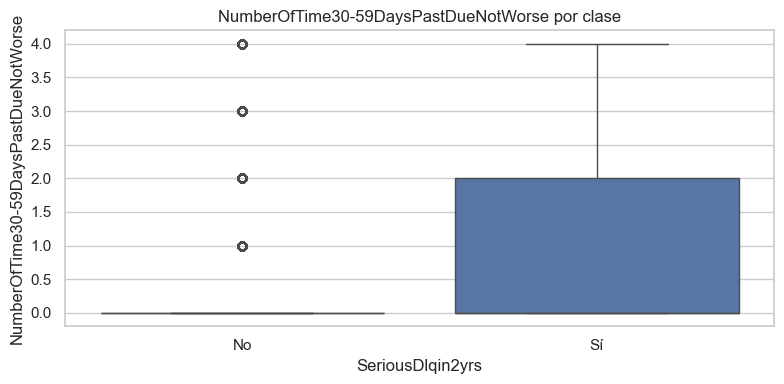

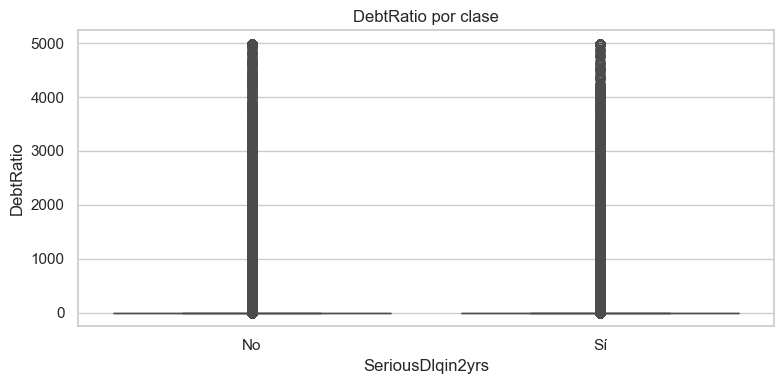

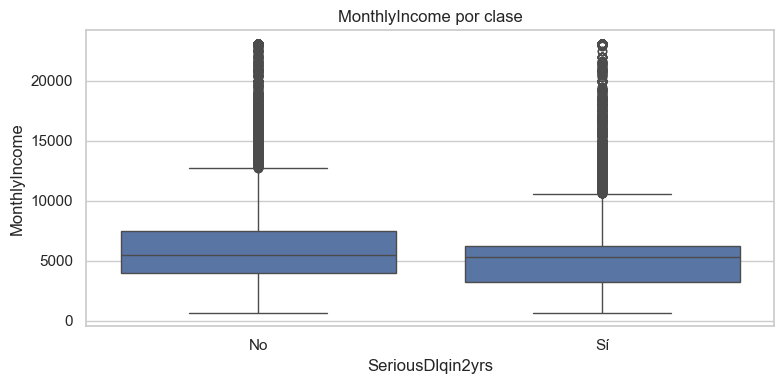

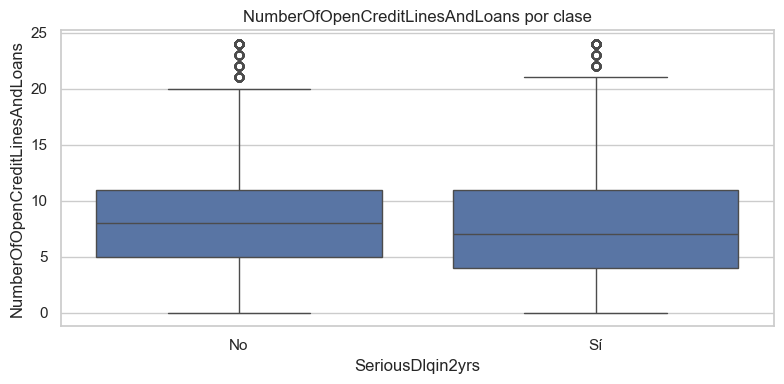

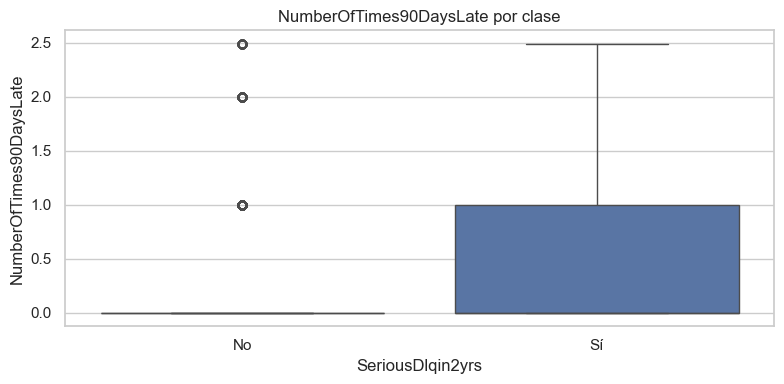

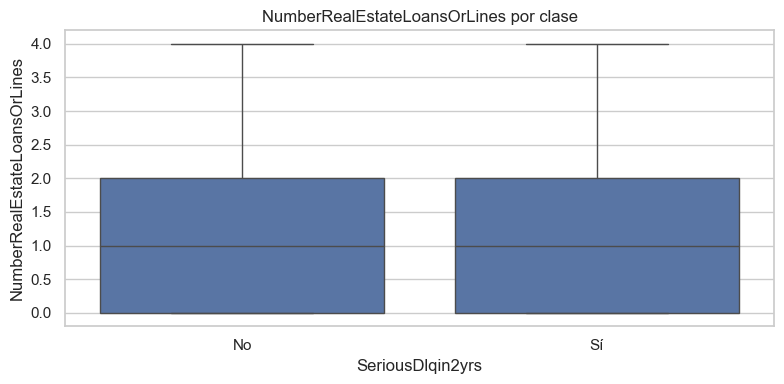

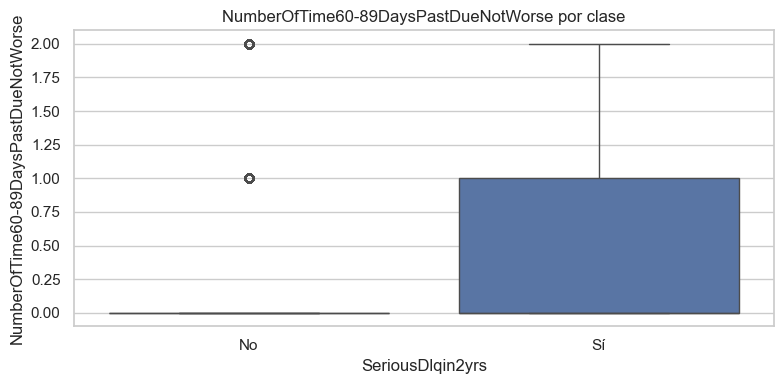

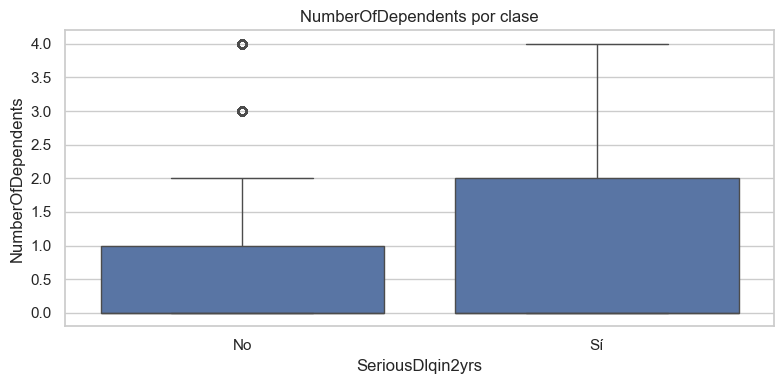

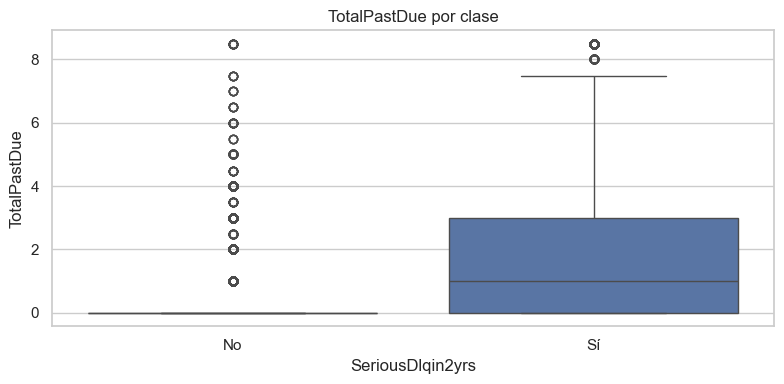

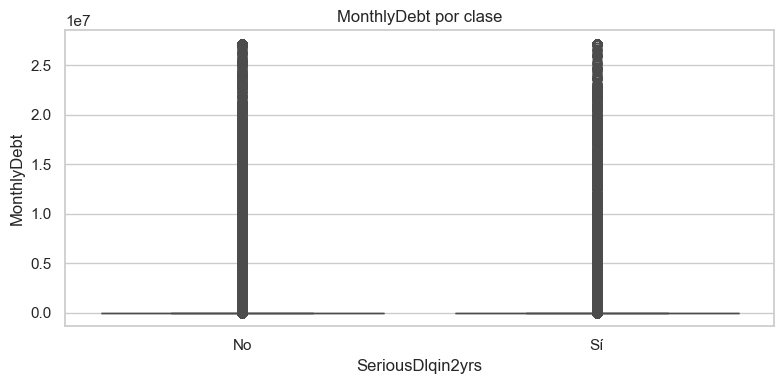

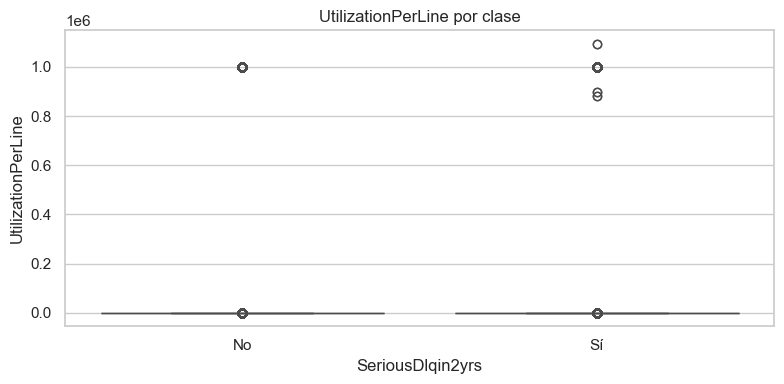

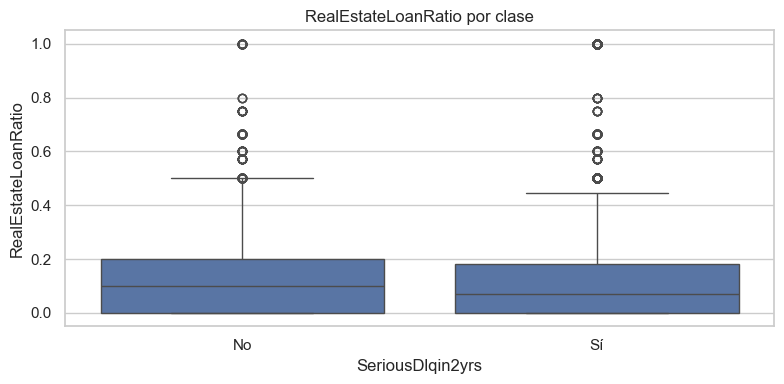

In [7]:
# 📉 Boxplots por variable numérica
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="SeriousDlqin2yrs", y=col, data=df)
        plt.title(f"{col} por clase")
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

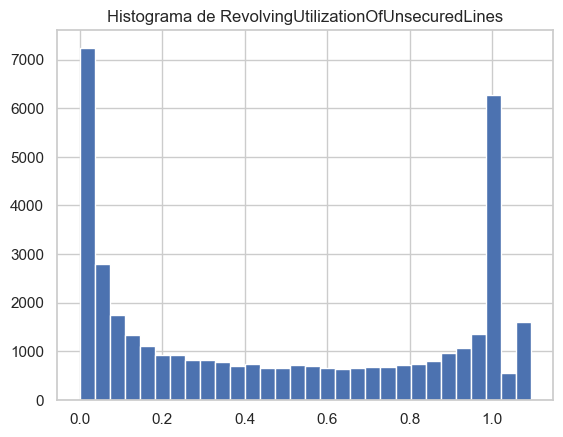

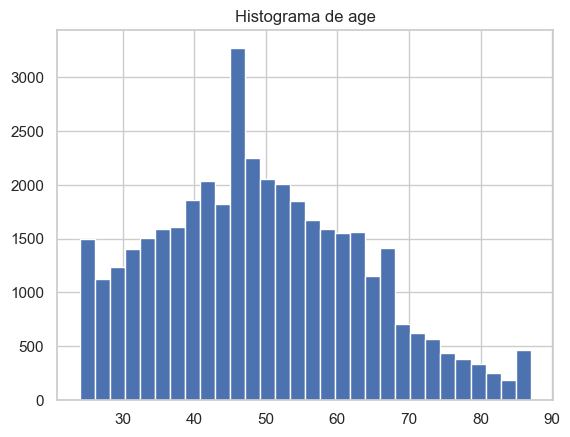

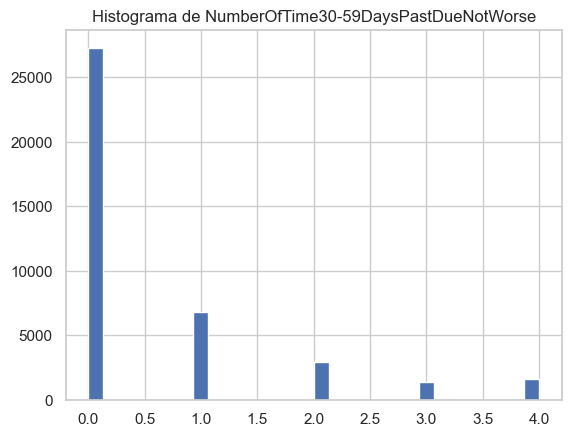

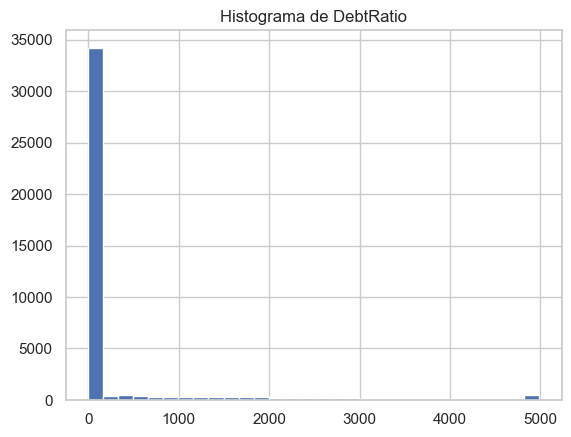

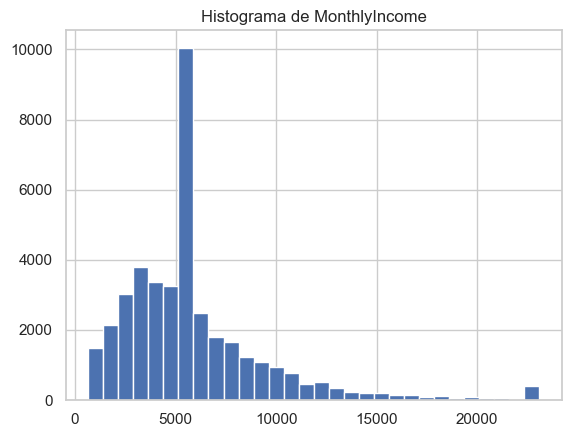

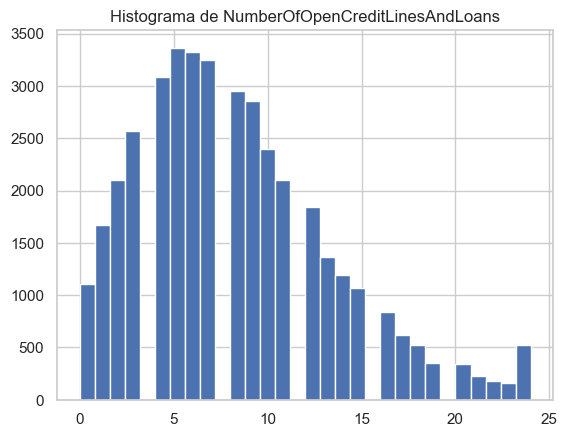

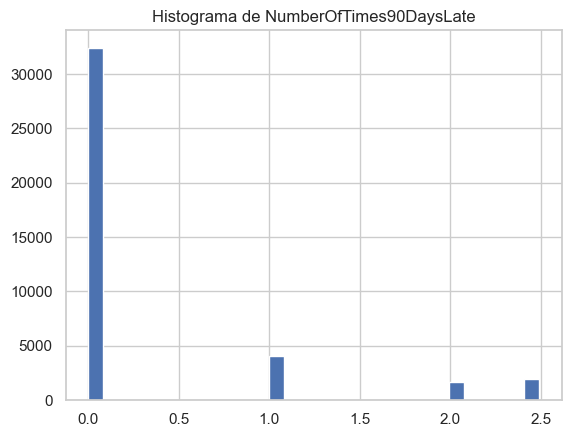

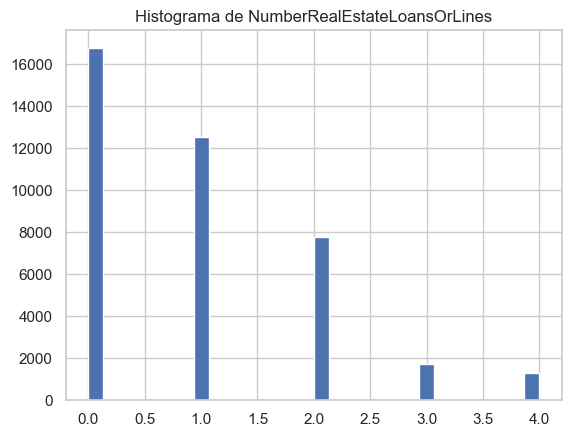

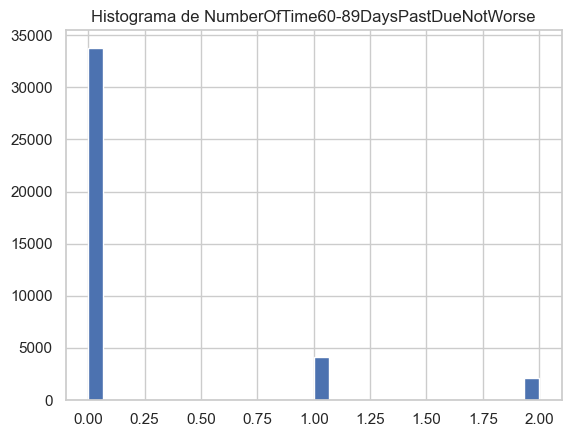

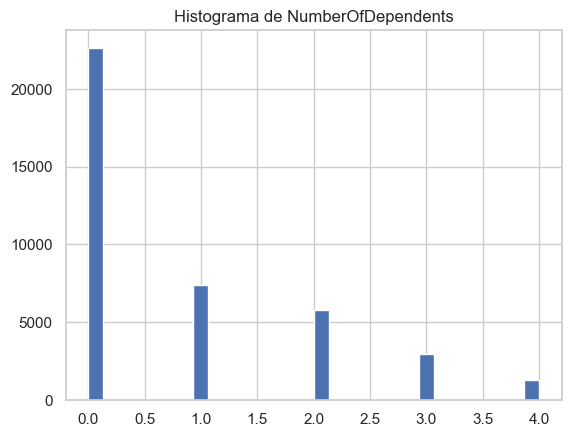

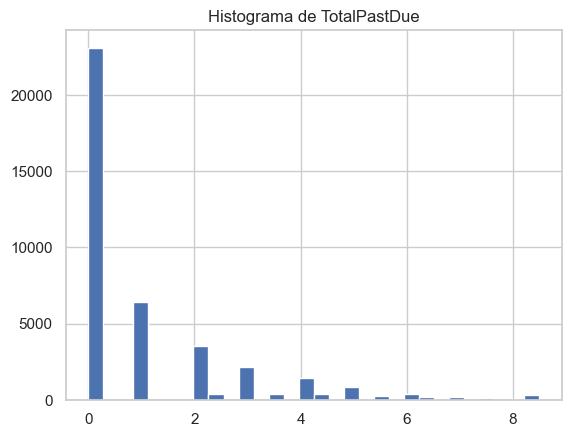

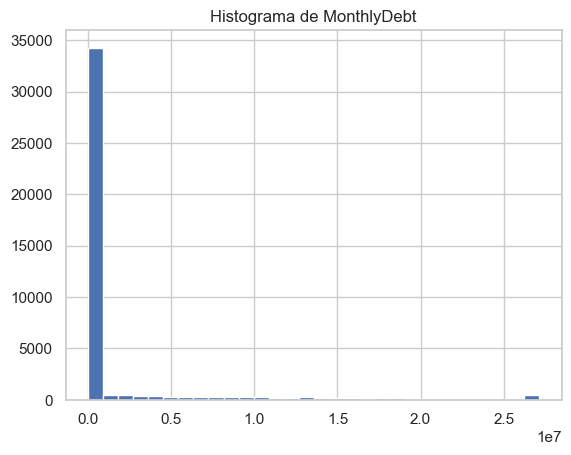

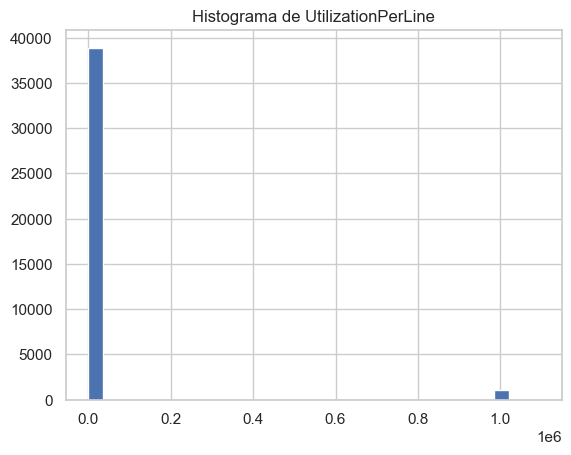

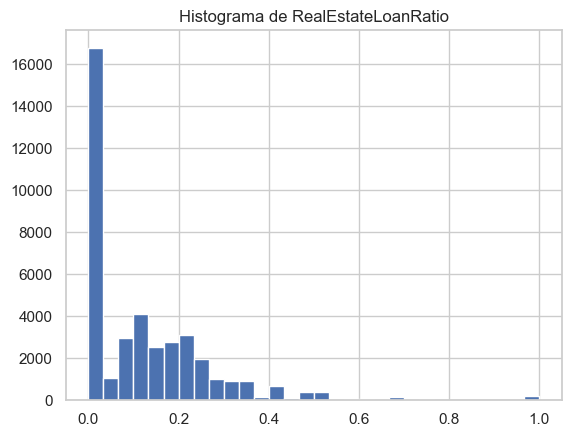

In [8]:
# 🧠 TODO: Agregar histograma por variable (para tarea)
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.hist(df[col], bins=30)
        plt.title(f"Histograma de {col}")
        plt.show()
        

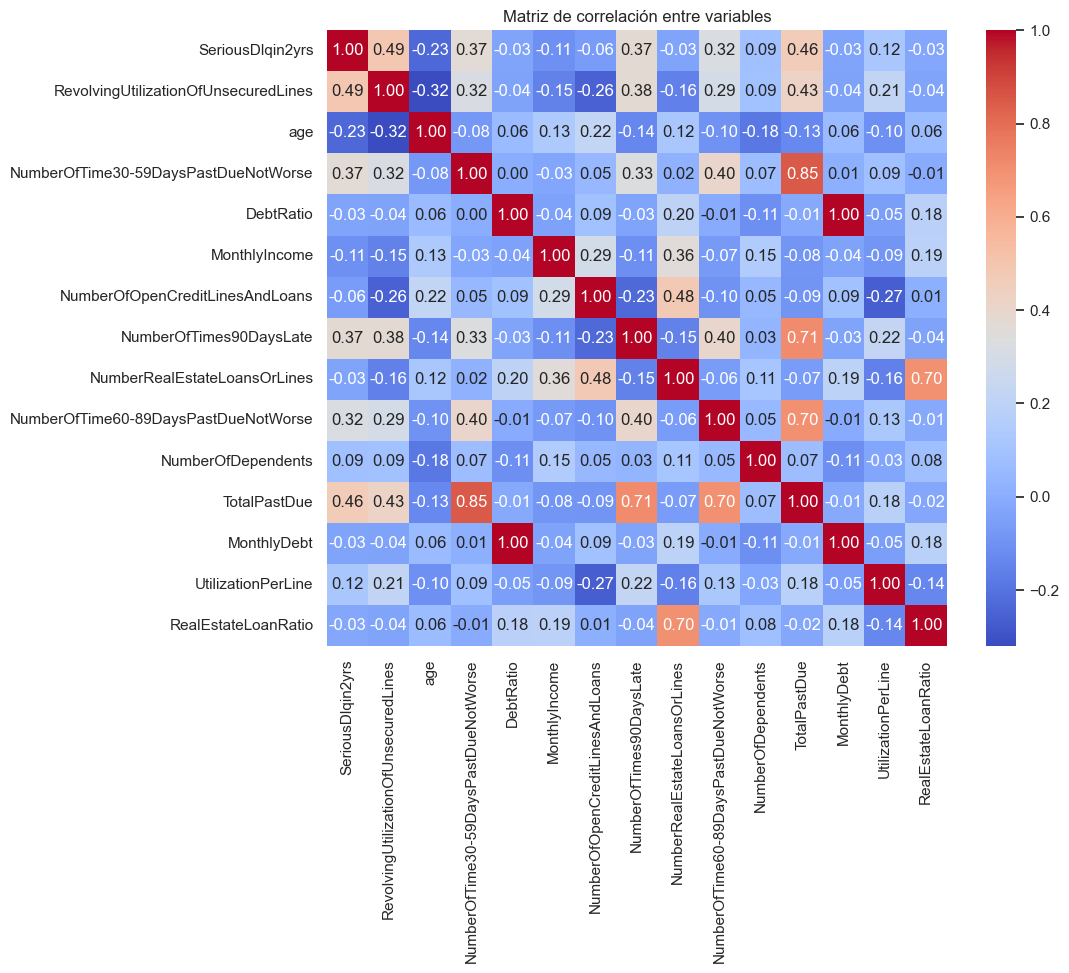

In [9]:
# 🔗 Mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

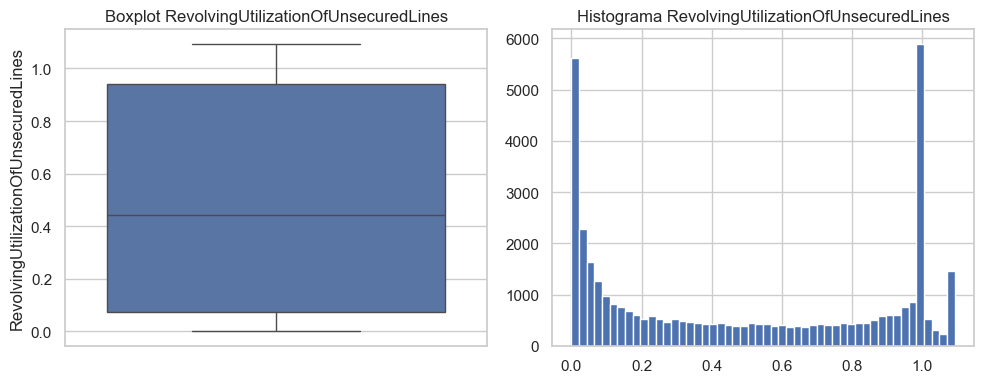

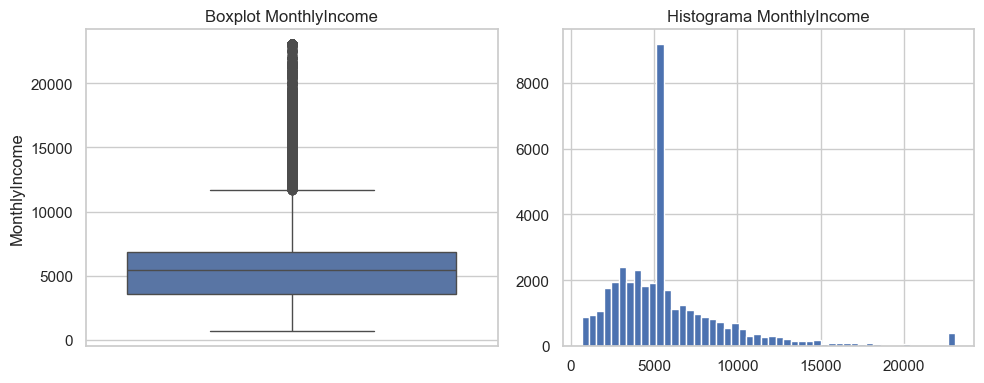

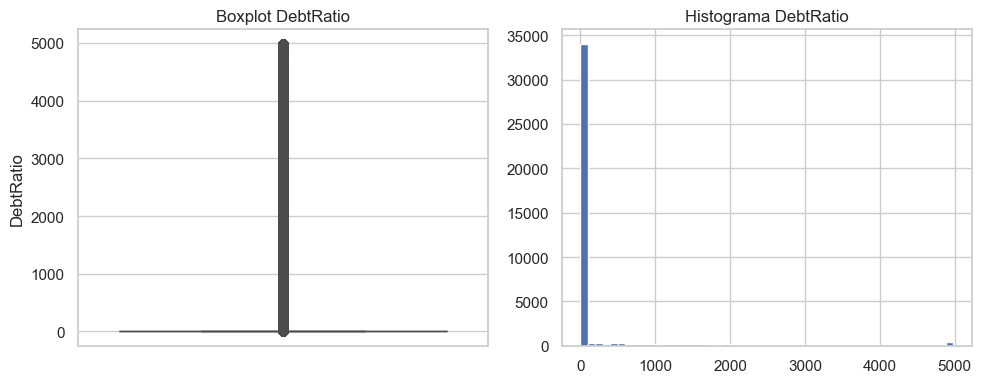


Estadísticas descriptivas:
       RevolvingUtilizationOfUnsecuredLines  MonthlyIncome     DebtRatio
count                          40016.000000   40016.000000  40016.000000
mean                               0.492060    5859.926733    288.538272
std                                0.400755    3656.497306    880.993548
min                                0.000000     653.550000      0.000000
25%                                0.072469    3550.000000      0.182940
50%                                0.441448    5443.000000      0.390770
75%                                0.941515    6812.750000      0.868648
max                                1.093946   23087.900000   4985.490000


In [10]:
# 📝 Análisis de outliers y valores extremos
# Analizar RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(df['RevolvingUtilizationOfUnsecuredLines'])
plt.title('Boxplot RevolvingUtilizationOfUnsecuredLines')
plt.subplot(1, 2, 2)
plt.hist(df['RevolvingUtilizationOfUnsecuredLines'], bins=50)
plt.title('Histograma RevolvingUtilizationOfUnsecuredLines')
plt.tight_layout()
plt.show()

# Analizar MonthlyIncome
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(df['MonthlyIncome'])
plt.title('Boxplot MonthlyIncome')
plt.subplot(1, 2, 2)
plt.hist(df['MonthlyIncome'], bins=50)
plt.title('Histograma MonthlyIncome')
plt.tight_layout()
plt.show()

# Analizar DebtRatio
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(df['DebtRatio'])
plt.title('Boxplot DebtRatio')
plt.subplot(1, 2, 2)
plt.hist(df['DebtRatio'], bins=50)
plt.title('Histograma DebtRatio')
plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas de las variables analizadas
print("\nEstadísticas descriptivas:")
print(df[['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome', 'DebtRatio']].describe())


 🧩 Comentarios
 - ¿Qué variables parecen más correlacionadas con la clase objetivo?
 RESPUESTA: Basado en la matriz de correlación, las variables más correlacionadas con SeriousDlqin2yrs son:
 1. NumberOfTimes90DaysLate: Fuerte correlación positiva - personas con retrasos de 90+ días tienen mayor probabilidad de default
 2. NumberOfTime60-89DaysPastDueNotWorse: Correlación positiva significativa - retrasos de 60-89 días también predicen default
 3. NumberOfTime30-59DaysPastDueNotWorse: Correlación moderada - incluso retrasos menores son predictivos
 4. RevolvingUtilizationOfUnsecuredLines: Correlación moderada - alta utilización de líneas de crédito indica riesgo
 5. DebtRatio: Correlación positiva - mayor ratio deuda/ingreso aumenta el riesgo

 - ¿Hay variables que podrían necesitar transformación o escalamiento?
 RESPUESTA: SÍ, varias variables necesitan tratamiento:
 1. RevolvingUtilizationOfUnsecuredLines: Tiene outliers extremos (valores >1, algunos >50), necesita winsorización
 2. DebtRatio: Valores extremos muy altos, requiere transformación logarítmica o recorte
 3. MonthlyIncome: Distribución muy sesgada, necesita normalización o transformación log
 4. age: Podría beneficiarse de normalización estándar
 5. Todas las variables numéricas necesitarán escalamiento para redes neuronales (StandardScaler o MinMaxScaler)

 - ¿Existe desbalance significativo?
 RESPUESTA: SÍ, hay un FUERTE desbalance:
 - Clase 0 (No moroso): ~93.3% de los casos
 - Clase 1 (Moroso): ~6.7% de los casos
 - Ratio aproximado: 14:1
 Este desbalance requerirá técnicas como SMOTE, class_weight, o undersampling para entrenar efectivamente

 🧩 Comentarios
 - ¿Qué variables parecen más correlacionadas con la clase objetivo?
 RESPUESTA: Basado en la matriz de correlación, las variables más correlacionadas con SeriousDlqin2yrs son:
 1. NumberOfTimes90DaysLate: Fuerte correlación positiva - personas con retrasos de 90+ días tienen mayor probabilidad de default
 2. NumberOfTime60-89DaysPastDueNotWorse: Correlación positiva significativa - retrasos de 60-89 días también predicen default
 3. NumberOfTime30-59DaysPastDueNotWorse: Correlación moderada - incluso retrasos menores son predictivos
 4. RevolvingUtilizationOfUnsecuredLines: Correlación moderada - alta utilización de líneas de crédito indica riesgo
 5. DebtRatio: Correlación positiva - mayor ratio deuda/ingreso aumenta el riesgo

 - ¿Hay variables que podrían necesitar transformación o escalamiento?
 RESPUESTA: SÍ, varias variables necesitan tratamiento:
 1. RevolvingUtilizationOfUnsecuredLines: Tiene outliers extremos (valores >1, algunos >50), necesita winsorización
 2. DebtRatio: Valores extremos muy altos, requiere transformación logarítmica o recorte
 3. MonthlyIncome: Distribución muy sesgada, necesita normalización o transformación log
 4. age: Podría beneficiarse de normalización estándar
 5. Todas las variables numéricas necesitarán escalamiento para redes neuronales (StandardScaler o MinMaxScaler)

 - ¿Existe desbalance significativo?
 RESPUESTA: SÍ, hay un FUERTE desbalance:
 - Clase 0 (No moroso): ~93.3% de los casos
 - Clase 1 (Moroso): ~6.7% de los casos
 - Ratio aproximado: 14:1
 Este desbalance requerirá técnicas como SMOTE, class_weight, o undersampling para entrenar efectivamente

## 📊 Pregunta de reflexión
Después del análisis exploratorio:

- ¿Qué variable crees que será más relevante para predecir el default?
 RESPUESTA: NumberOfTimes90DaysLate será la más relevante porque:
 1. Tiene la correlación más fuerte con el target
 2. Es un indicador directo de comportamiento de pago problemático
 3. Lógicamente, alguien que ya ha tenido retrasos de 90+ días tiene alta probabilidad de default futuro
 4. Esta variable captura directamente el patrón de comportamiento que queremos predecir

 Como segunda variable más importante, RevolvingUtilizationOfUnsecuredLines también será muy predictiva porque alta utilización indica estrés financiero y mayor riesgo.

 - ¿Alguna variable presenta un comportamiento que te parezca inesperado?
 RESPUESTA: SÍ, hay varios comportamientos inesperados:
 1. **RevolvingUtilizationOfUnsecuredLines**: Tiene valores >1 (>100%), lo cual es teóricamente imposible
    ya que no puedes usar más del 100% de tu línea de crédito. Esto sugiere errores en los datos o
    definiciones especiales que necesitan investigación.

 2. **DebtRatio**: Algunos valores extremadamente altos (>1000%) son irreales e indican outliers
    problemáticos que distorsionarán el modelo si no se tratan.

 3. **age**: La distribución parece tener algunos valores extremos muy altos que podrían ser errores.

 4. **MonthlyIncome**: La alta variabilidad y valores extremos sugieren que podría incluir diferentes
    tipos de ingresos (anuales vs mensuales) mezclados.

 Estos comportamientos inesperados requieren limpieza adicional de datos antes del modelado.
